<a href="https://colab.research.google.com/github/isabellaortiz5/IDCard-Tampering-Detection/blob/main/IDCardTamperingDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
# Create directory
!mkdir IDCard_tampering
!mkdir IDCard_tampering/image

In [3]:
# Open image

original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

Load original and user provided images.

In [4]:
# The file format of the source file.

print("Original image format : ",original.format)
print("Original image format : ",tampered.format)

# Image size, in pixels. The size is given as (width, height).

print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Original image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


Converting the format of tampered image similar to original image.

In [5]:
# Resize Image to match

original = original.resize((250,160))
print(original.size)
original.save('IDCard_tampering/image/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('IDCard_tampering/image/tampered.png')

(250, 160)
(250, 160)


# **Original Image**

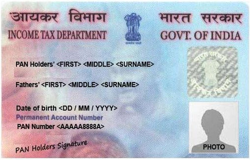

In [6]:
original


# **Tampered Image**

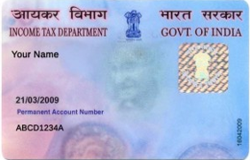

In [7]:
tampered

Loading the input images

In [8]:
original = cv2.imread('IDCard_tampering/image/original.png')
tampered = cv2.imread('IDCard_tampering/image/tampered.png')

Reading images using opencv

In [9]:
# Converting images to grayscale
original_gray = cv2. cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2. cvtColor(tampered, cv2.COLOR_BGR2GRAY)


Converting color images to grayscale with OpenCV simplifies image analysis by reducing complexity. Grayscale images have one channel for light intensity, unlike color images' three channels(red, green, and blue), making them easier for algorithms to process, especially for tasks like edge detection. This conversion enhances image processing efficiency.

In [10]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
# divide it to normalize
diff = (diff * 255).astype('uint8')
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


The Structural Similarity Index (SSIM) precisely locates differences between images using x,y coordinates, assessing the similarity between original and altered images. A lower SSIM score indicates less similarity between the two images.

In [11]:
# Calculate threshold and contours

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)



The adaptive thresholding function in computer vision transforms a grayscale image, stored as an array, into a binary format through a mathematical formula. The "find contours" function then extracts contours from this binary image, essential for shape analysis and recognition. Finally, "grab contours" retrieves the appropriate values of the contours.

In [12]:
# Loop over the contours
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (9, 9, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (9, 9, 255), 2)


The bounding rectangle method calculates an object's width-to-height ratio by determining and drawing its bounding box on input images, highlighting differences or similarities.

Original Image


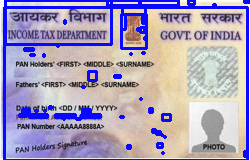

In [13]:
print('Original Image')
Image.fromarray(original)

Tampered Image


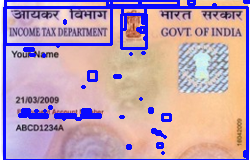

In [14]:
print('Tampered Image')
Image.fromarray(tampered)

Images with black

Different Image


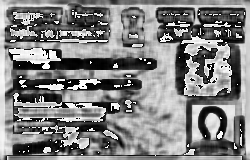

In [15]:
print('Different Image')
Image.fromarray(diff)

Threshold image in white


Threshold Image


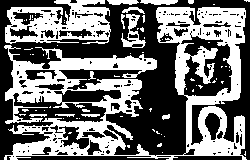

In [16]:
print('Threshold Image')
Image.fromarray(thresh)